In [191]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import re

In [200]:
def read_all_file_paths(list_of_files:list, start:int=None, end:int=None)->list:
  """
  Read a list of all of the file paths

  Args:
      list_of_files:List

  Returns:
      List
  """
  list_of_dfs = []
  
  if start and end:
    year_columns = [str(year) for year in range(start, end+1)]
  else:
    year_columns = [str(year) for year in range(1950, 2023)]
  
  cols_to_keep = ["country", "debt"] + year_columns
  
  for file in list_of_files:
    
    df = pd.read_csv(file + ".csv", encoding = "ISO-8859-1")
    df.fillna(0, inplace = True)
    df.columns = [re.sub(r'[^a-zA-Z0-9]', '', col) for col in df.columns]
    df.rename(columns={"countryname": "country", "indicatorname":"debt"}, inplace=True)

    if start and end:
      df.drop(columns=[col for col in df.columns if col not in cols_to_keep], inplace=True, axis=1)
    
    df['std_per_year'] = df[year_columns].std(axis=1)
    
    list_of_dfs.append(df)
  
  return list_of_dfs

def plot_debt_graph(df:pd.DataFrame, start:int, end:int)->None:
  """
  Takes in Dataframe and displays visulization

  Args:
      df (pd.DataFrame)
  """
  year_columns = [str(year) for year in range(start, end+1)]
  # Summing debt across all countries for each year
  annual_debt = df[year_columns].sum()

  # Plotting
  plt.figure(figsize=(15, 6))
  sns.lineplot(x=annual_debt.index, y=annual_debt.values)
  plt.title(f'Total Debt from {start} to {end}')
  plt.xlabel('Year')
  plt.ylabel('Total Debt')
  plt.xticks(rotation=45)
  plt.grid(True)
  plt.show()
  
def plot_by_country_name(country:str, df:pd.DataFrame, start:int, end:int)->None:
    """Plots country debt by name

    Args:
        country (str):
        df (pd.DataFrame):
    """
    
    year_columns = [str(year) for year in range(start, end)]

    # Set the figure size and layout
    plt.figure(figsize=(15, 6))


    country_data = df[df["country"] == country]
    plt.plot(year_columns, country_data[year_columns].values.flatten(), label=country)

    # Adding titles and labels
    plt.title(f'Debt by {country} from {start} to {end}')
    plt.xlabel('Year')
    plt.ylabel('Debt')
    plt.xticks(rotation=45)
    plt.legend()  # Add a legend if the number of countries is manageable
    plt.grid(True)
    plt.show()
      

In [201]:
#Establish intervals
START = 1990
END = 2022

file_paths = [
  'central_government_debt', 
  "household_debt",
  "general_government_debt",
  "non-financial_corporate_debt",
  "private_debt"
  ]

centeral_government, household_debt, general_government_debt, non_financial_debt, private_debt = read_all_file_paths(file_paths,1990,2022)

Index(['countryname', 'indicatorname', '1950', '1951', '1952', '1953', '1954',
       '1955', '1956', '1957', '1958', '1959', '1960', '1961', '1962', '1963',
       '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972',
       '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981',
       '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990',
       '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021', '2022'],
      dtype='object')
Index(['countryname', 'indicatorname', '1950', '1951', '1952', '1953', '1954',
       '1955', '1956', '1957', '1958', '1959', '1960', '1961', '1962', '1963',
       '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972',
       '1973', '1974', '1975', '1976', '1977', '1978', '1979'

In [177]:
household_debt[household_debt["std_per_year"] >35]

,country,debt,1990,1991,1992,1993,1994,1995,1996,1997,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,std_per_year
19,Cyprus,"Annual average of household debt, loans and de...",0.0,0.0,0.0,0.0,0.000000,62.869385,65.958193,68.995044,...,130.996751,126.425136,115.699815,104.951679,95.761496,86.151251,89.385248,83.014555,0.000000,41.917294
21,Denmark,"Annual average of household debt, loans and de...",0.0,0.0,0.0,0.0,68.406916,73.319871,76.449968,79.401097,...,123.743555,119.223751,117.106531,113.844895,111.928070,110.577359,111.949207,104.287876,86.220814,39.833185
34,Ireland,"Annual average of household debt, loans and de...",0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,80.392137,55.773150,52.748644,46.672018,41.797931,37.517837,35.365415,30.520804,26.002471,41.871252
74,Switzerland,"Annual average of household debt, loans and de...",0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,119.550265,122.321201,123.749092,126.157987,124.921835,126.327073,134.506898,131.751398,128.298231,52.370941
77,Thailand,"Annual average of household debt, loans and de...",0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,79.726248,81.161613,79.394403,78.131096,78.354182,79.867038,89.577417,90.166434,86.899036,35.950458


/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


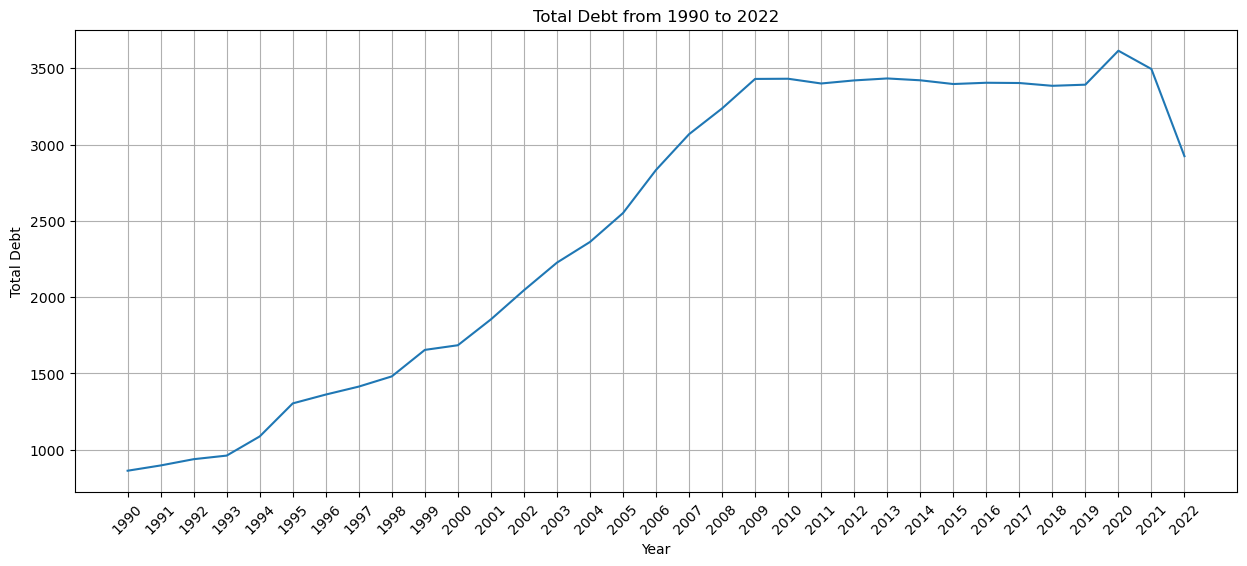

In [178]:
plot_debt_graph(household_debt, START, END)

/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


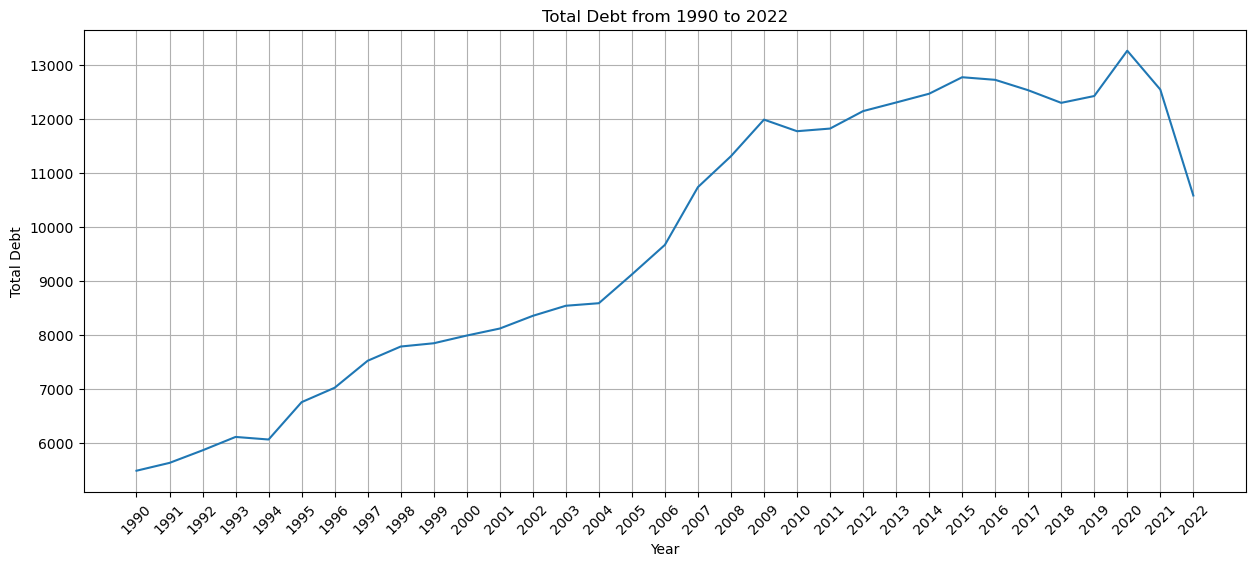

In [179]:
plot_debt_graph(private_debt, START, END)

/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


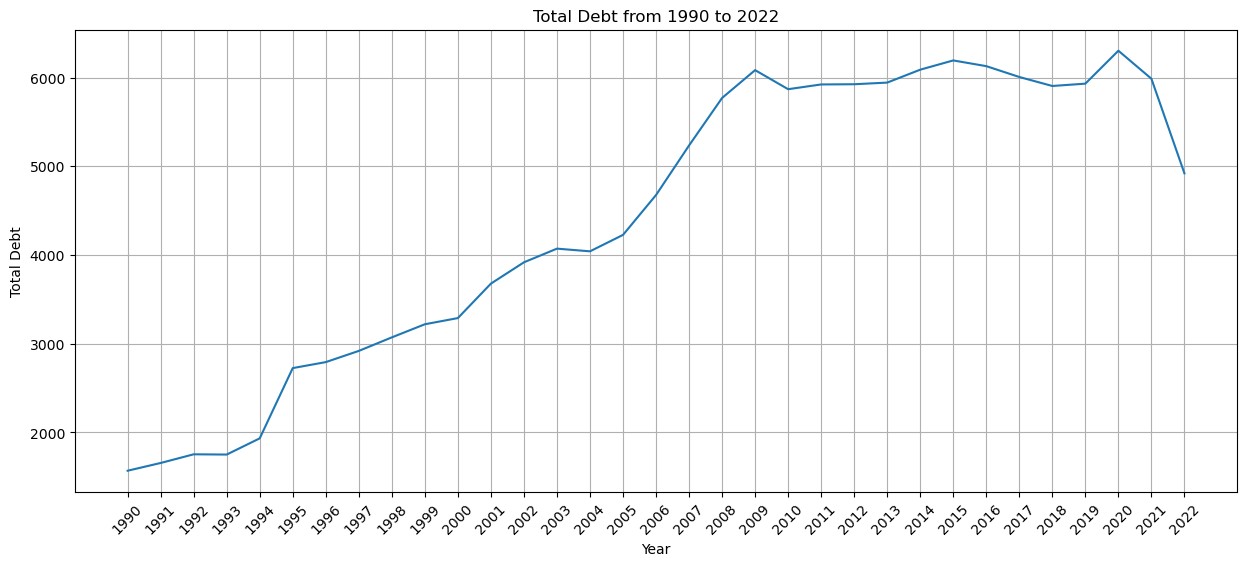

In [180]:
plot_debt_graph(non_financial_debt, START, END)

/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


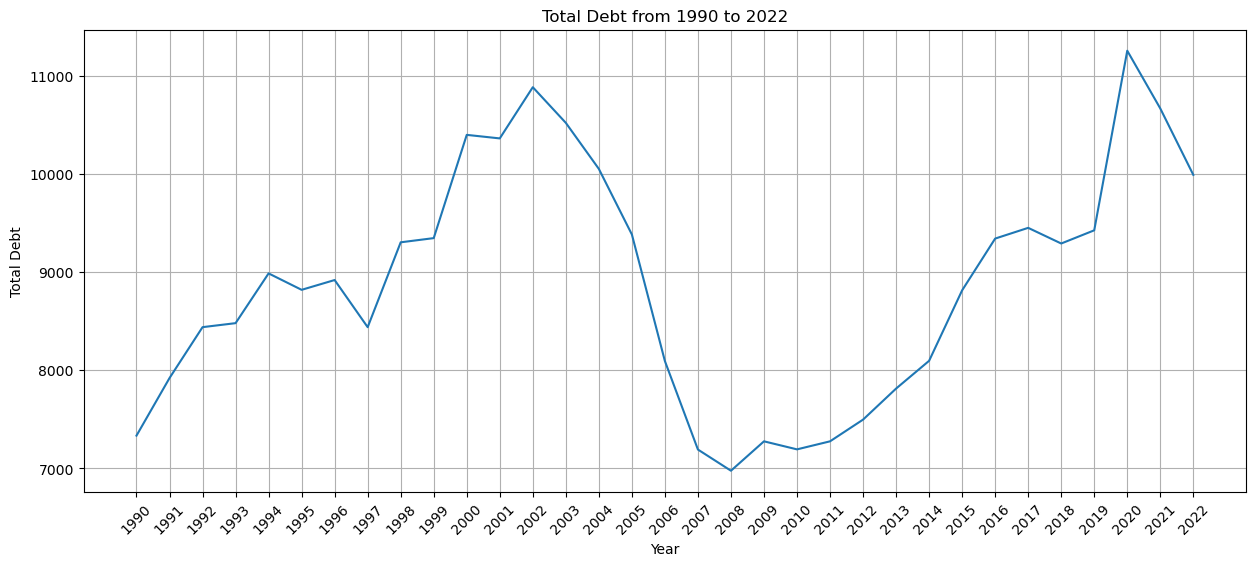

In [181]:
plot_debt_graph(centeral_government, START, END)

/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


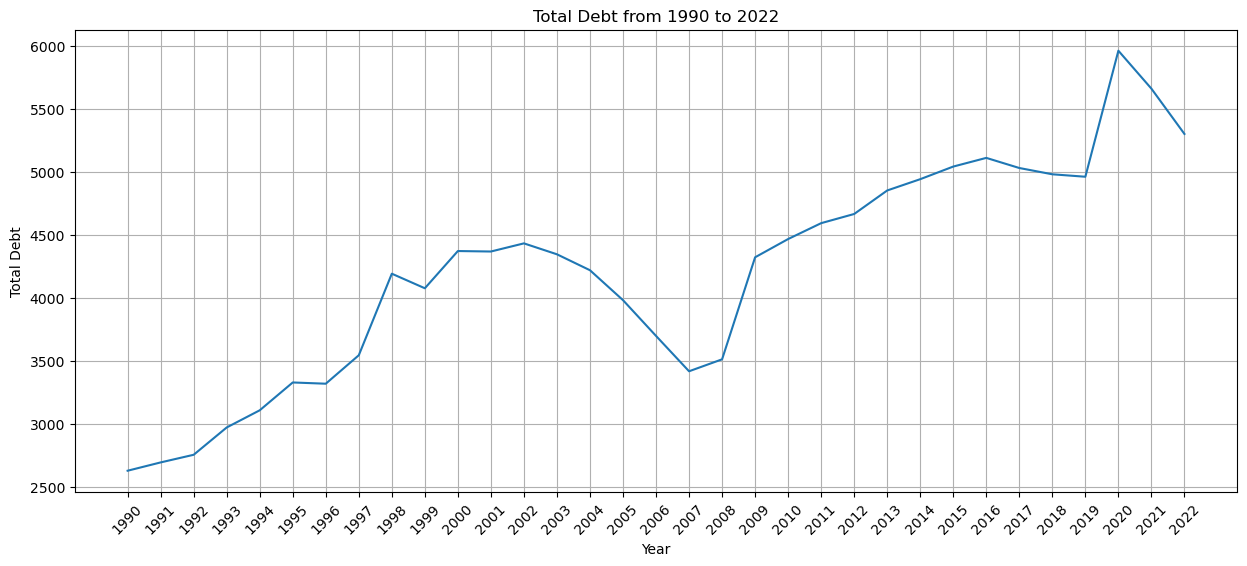

In [182]:
plot_debt_graph(general_government_debt, START, END)

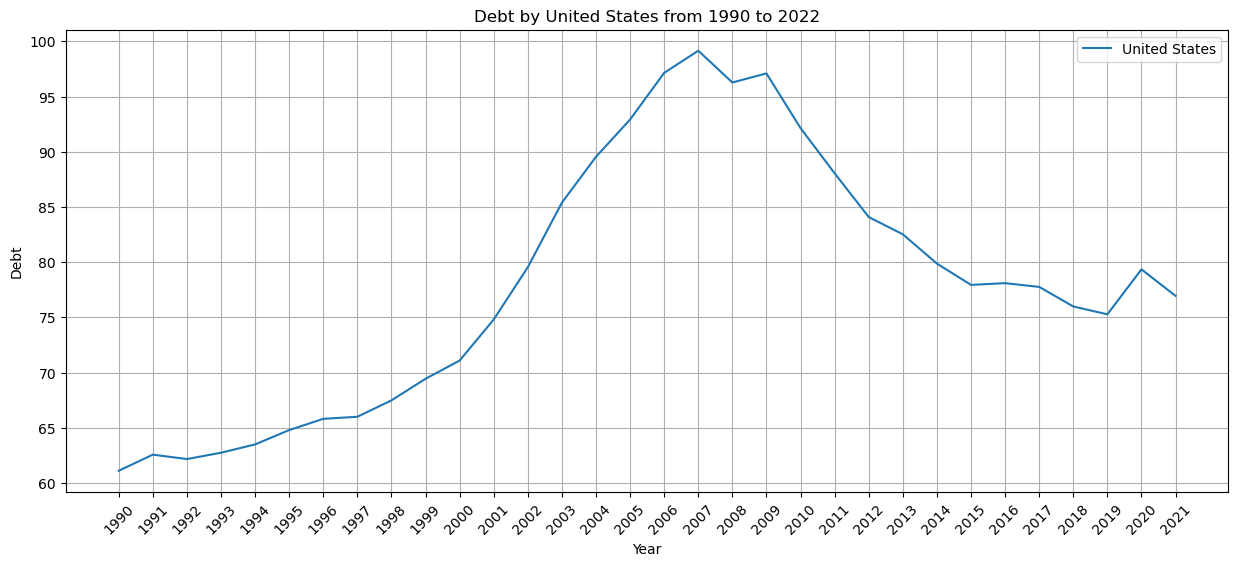

In [183]:
plot_by_country_name("United States", household_debt, START, END)

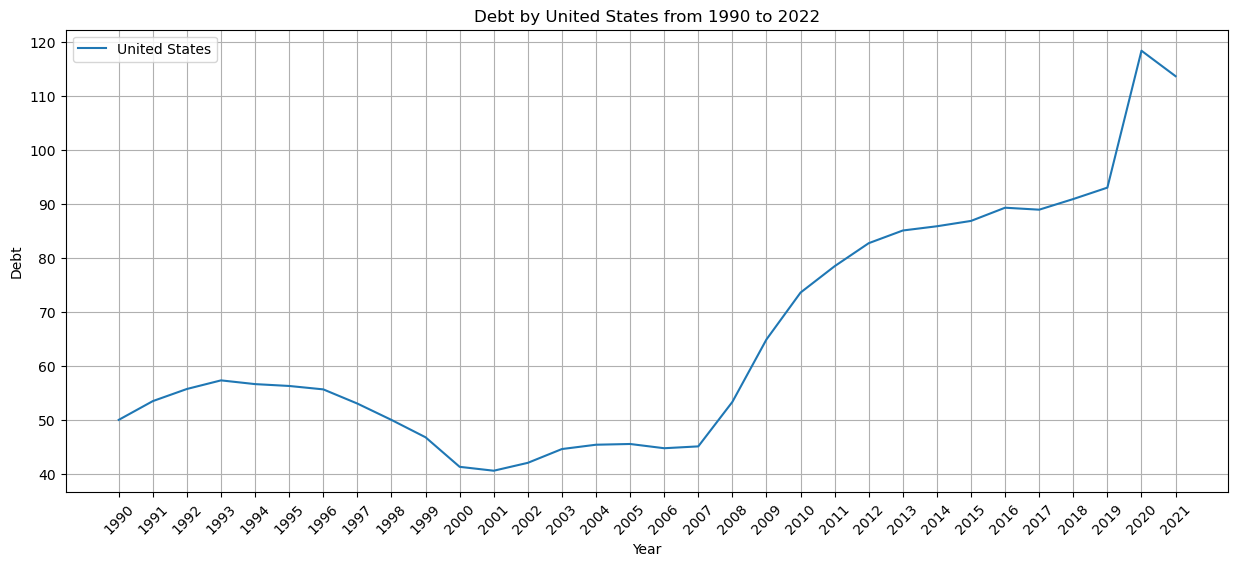

In [184]:
plot_by_country_name("United States", centeral_government, START, END)

In [185]:
plot_by_country_name("United States", non_financial_debt, START, END)

KeyError: 'country'

<Figure size 1500x600 with 0 Axes>

In [190]:
import re

private_debt.columns = [re.sub(r'[^a-zA-Z0-9]', '', col) for col in private_debt.columns]

,debt,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,stdperyear
0,"Annual average of private debt, loans and debt...",14.095232,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.637246,3.702463,3.373760,3.337243,3.135160,2.821018,2.569163,0.000000,0.000000,3.792576
1,"Annual average of private debt, loans and debt...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,47.042119,44.539943,43.179743,40.766139,36.655129,37.282140,41.261921,38.498930,36.799420,20.064536
2,"Annual average of private debt, loans and debt...",0.000000,0.000000,0.000000,0.000000,0.000000,7.587815,9.579699,8.033063,9.476931,...,17.933278,21.264263,22.405195,24.304322,24.397565,25.170849,28.456028,24.870168,20.272896,7.900386
3,"Annual average of private debt, loans and debt...",18.250536,17.131641,19.173330,22.517761,24.205327,24.754489,25.628450,28.670448,30.999311,...,19.649357,21.444973,20.753100,24.894169,28.980003,27.968837,29.670779,22.888757,22.300929,8.302095
4,"Annual average of private debt, loans and debt...",120.473050,120.353963,117.830511,112.593464,112.396552,113.962373,115.705776,121.130159,126.158665,...,188.771774,199.380809,200.672521,195.783598,195.436122,191.417708,193.834699,183.666105,173.616535,31.580380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,"Annual average of private debt, loans and debt...",16.795367,18.724175,18.901666,16.030988,9.353501,8.801891,8.263696,12.819570,12.243052,...,24.789496,23.821575,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.352371
155,"Annual average of private debt, loans and debt...",0.000000,0.000000,10.755824,13.018172,0.000000,14.558042,14.704030,15.632426,15.849070,...,80.001032,90.399227,98.858961,103.972032,105.275985,108.031901,115.525350,124.397353,126.380692,40.027176
156,"Annual average of private debt, loans and debt...",5.219792,4.943735,4.654832,4.846797,4.202767,4.604806,3.014533,3.888262,5.349376,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.774900
157,"Annual average of private debt, loans and debt...",7.301192,6.425267,4.646483,4.212164,5.505763,7.228139,7.985905,6.761560,5.906687,...,13.286469,15.628654,12.005455,11.099158,11.585763,12.432818,12.197123,8.420665,10.390523,2.892152


In [188]:
plot_by_country_name("United States", private_debt, START, END)

KeyError: 'country'

<Figure size 1500x600 with 0 Axes>

In [97]:
household_debt

,country,debt,1950,1951,1952,1953,1954,1955,1956,1957,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,std
0,Afghanistan,"Annual average of household debt, loans and de...",0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.697100,0.577473,0.648992,0.652998,0.669492,0.565135,0.544819,0.000000,0.000000,NaN
1,Albania,"Annual average of household debt, loans and de...",0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.729247,11.276374,11.273276,11.321095,11.137844,11.494039,12.628963,12.295268,12.531274,NaN
2,Argentina,"Annual average of household debt, loans and de...",0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.720705,6.352101,5.956233,6.914792,6.566565,5.314137,5.510188,4.525431,4.074608,NaN
3,Australia,"Annual average of household debt, loans and de...",0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,115.536449,121.059943,123.677817,122.988365,122.268566,119.082593,122.537046,118.208377,111.751978,NaN
4,Austria,"Annual average of household debt, loans and de...",0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,50.242221,50.138075,50.230140,49.537066,48.926985,48.890197,52.442444,51.387583,48.187172,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,Ukraine,"Annual average of household debt, loans and de...",0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,13.316687,8.795559,6.856581,5.842179,5.653822,5.353357,4.901668,4.672354,4.523612,NaN
80,United Arab Emirates,"Annual average of household debt, loans and de...",0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19.710653,24.321224,25.600513,23.534887,21.514673,21.654104,25.671165,22.806818,20.106850,NaN
81,United Kingdom,"Annual average of household debt, loans and de...",0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,87.177177,86.589106,86.481457,85.827393,85.434155,84.000075,91.009028,86.881290,83.165809,NaN
82,United States,"Annual average of household debt, loans and de...",24.802614,23.91165,25.976296,27.794074,30.862721,33.318558,34.880478,35.738266,...,79.869920,77.942384,78.098646,77.759808,75.986963,75.276262,79.348115,76.944509,74.438409,NaN
